"TACTICS vs. RATINGS: A DATA-DRIVEN EXPLORATION of CHESS MASTERY"

Business Problem:
Using variables such as tactical skills, puzzle rush performances, rapid ratings and win rates of chess players, it is aimed to predict players' blitz ratings.
Using machine learning techniques (Linear Regression and Random Forest), it is tried to predict players' future blitz performances by determining which factors are more effective on blitz rating.This study is valuable in terms of analyzing the development of chess players, discovering talented players early and providing data-driven predictions for performance improvements.

About Dataset
Dataset is updated till 17/7/2023

The dataset contains detailed statistics of all the GM (GrandMaster) titled players in chess.com, with the following columns. Can you spot rising stars? GM secret accounts? Players with huge potential?

name: The name of the chess player

username: The username of the player in chess.com

profile: The profile link redirect to chess.com

user_id: The user id in chess.com

title: GM (GrandMaster)

fide: Player's FIDE rating

In the world of chess, the highest governing body – Federation Internationale des Echecs (FIDE), maintains and updates the rankings of professional chess players based on their performances in registered tournaments.

country: Player's nation

followers: Number of followers of the player in chess.com

joined: The date where the player registered in chess.com

last_online: Last time the player went online in chess.com

current_rapid_rating: Current rapid rating of the player
(Rapid has the same rules as classical but players have between 10 and 60 minutes to make their moves.)

highest_rapid_rating: Highest rapid rating that the player ever achieved in chess.com

highest_rapid_date: The date where the player achieved their highest rapid rating in chess.com

rapid_win: Total number of rapid wins

rapid_draw: Total number of rapid draws

rapid_loss: Total number of rapid losses

current_blitz_rating: Current blitz rating of the player (For games over 3 minutes but under 10 minutes)

highest_blitz_rating: Highest blitz rating that the player ever achieved in chess.com

highest_blitz_date: The date where the player achieved their highest blitz rating in chess.com

blitz_win: Total number of blitz wins

blitz_draw: Total number of blitz draws

blitz_loss: Total number of blitz losses

current_bullet_rating: Current bullet rating of the player (For games under 60 seconds)

highest_bullet_rating: Highest bullet rating that the player ever achieved in chess.com

highest_bullet_date: The date where the player achieved their highest bullet rating in chess.com

bullet_win: Total number of bullet wins

bullet_draw: Total number of bullet draws

bullet_loss: Total number of bullet losses

highest_tactics_rating: The highest rating player achieved on puzzle mode in chess.com

highest_tactics_date: The date player achieved their highest tactics rating

highest_puzzle_rating: The highest rating player achieved on puzzle rush mode in chess.com

is_streamer: Whether the player is a streamer or not

status: If the player is a premier user or basic user

league: The league the player is currently in in chess.com (heavily based on frequency of playing games on chess.com)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# CSV dosyasından veri setini yükleme
df = pd.read_csv('GM_players_statistics.csv')

# Veri setinin ilk birkaç satırını görüntüleme
print("İlk 5 kayıt:")
print(df.head())

İlk 5 kayıt:
   Unnamed: 0                name        username  \
0           0       Komodo Engine     komodochess   
1           1        Vojtěch Plát     vojtechplat   
2           2  PlayMagnus Carlsen      playmagnus   
3           3      Magnus Carlsen   magnuscarlsen   
4           4     Fabiano Caruana  fabianocaruana   

                                       profile   user_id title    fide  \
0     https://www.chess.com/member/KomodoChess  24944922    GM  3411.0   
1     https://www.chess.com/member/VojtechPlat  37712368    GM  2950.0   
2      https://www.chess.com/member/PlayMagnus  19578862    GM  2882.0   
3   https://www.chess.com/member/MagnusCarlsen   3889224    GM  2882.0   
4  https://www.chess.com/member/FabianoCaruana  11177810    GM  2835.0   

          country  followers      joined  ... highest_bullet_date  bullet_win  \
0   United States        494  07/11/2015  ...                 NaN         NaN   
1  Czech Republic        360  11/08/2017  ...          27/09/

In [3]:
# Win Oranlarını Hesaplama ve Veri Setine Eklenmesi
# Blitz ve rapid için toplam maç sayısını hesaplama
df['blitz_total'] = df['blitz_win'] + df['blitz_draw'] + df['blitz_loss']
df['rapid_total'] = df['rapid_win'] + df['rapid_draw'] + df['rapid_loss']

In [4]:
# Win oranı hesaplama (toplam maç sayısı 0 olan durumlar için bölme hatasını önlemek amacıyla np.where kullanılıyor)
df['blitz_win_rate'] = np.where(df['blitz_total'] > 0, df['blitz_win'] / df['blitz_total'], 0)
df['rapid_win_rate'] = np.where(df['rapid_total'] > 0, df['rapid_win'] / df['rapid_total'], 0)

In [5]:
# Kullanılacak Sütunları Seçme
selected_columns = [
    'highest_tactics_rating', 
    'highest_puzzle_rush_score', 
    'current_blitz_rating', 
    'current_rapid_rating',
    'blitz_win_rate',
    'rapid_win_rate'
]

In [6]:
df_model = df[selected_columns].copy()
print("\nWin oranları eklenmiş veri örneği:")
print(df_model.head())


Win oranları eklenmiş veri örneği:
   highest_tactics_rating  highest_puzzle_rush_score  current_blitz_rating  \
0                     400                        NaN                   NaN   
1                    3251                       49.0                2823.0   
2                     400                        NaN                   NaN   
3                     400                        NaN                3287.0   
4                    3519                       64.0                3125.0   

   current_rapid_rating  blitz_win_rate  rapid_win_rate  
0                   NaN        0.000000        0.000000  
1                2383.0        0.464099        0.521739  
2                   NaN        0.000000        0.000000  
3                2925.0        0.691321        0.581081  
4                2794.0        0.662304        0.450185  


In [7]:
# Eksik değer kontrolü
print("\nEksik değer sayıları:")
print(df_model.isnull().sum())


Eksik değer sayıları:
highest_tactics_rating         0
highest_puzzle_rush_score    387
current_blitz_rating         120
current_rapid_rating         453
blitz_win_rate                 0
rapid_win_rate                 0
dtype: int64


In [8]:
# Eksik değer içeren satırları kaldırma
df_model.dropna(inplace=True)
print("\nEksik değerler temizlendikten sonra veri seti boyutu:", df_model.shape)


Eksik değerler temizlendikten sonra veri seti boyutu: (881, 6)


In [9]:
# Outlier (Aşırı Uç) Değerlerin Çıkarılması
def remove_outliers_iqr(df, column, multiplier=1.5):
    """
    Belirtilen sütun için IQR yöntemini kullanarak outlier'ları çıkarır.
    
    df: DataFrame
    column: İncelenecek sütun adı
    multiplier: IQR'e uygulanacak katsayı (varsayılan 1.5)
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [10]:
# Outlier kontrolü yapmak istediğimiz sütunlar
columns = selected_columns  
df_clean = df_model.copy()

In [11]:
# Her bir sütun için outlier'ları çıkarıyoruz
for col in columns:
    df_clean = remove_outliers_iqr(df_clean, col)

print("Outlier'lar temizlendikten sonraki veri seti boyutu:", df_clean.shape)

Outlier'lar temizlendikten sonraki veri seti boyutu: (675, 6)


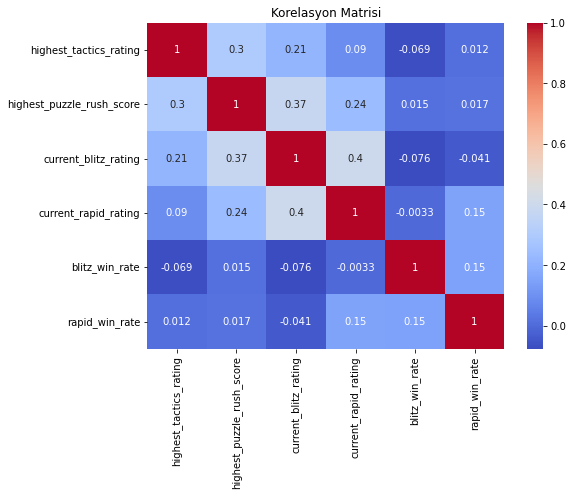

In [12]:
# Korelasyon matrisini hesaplama ve görselleştirme
corr_matrix = df_model.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

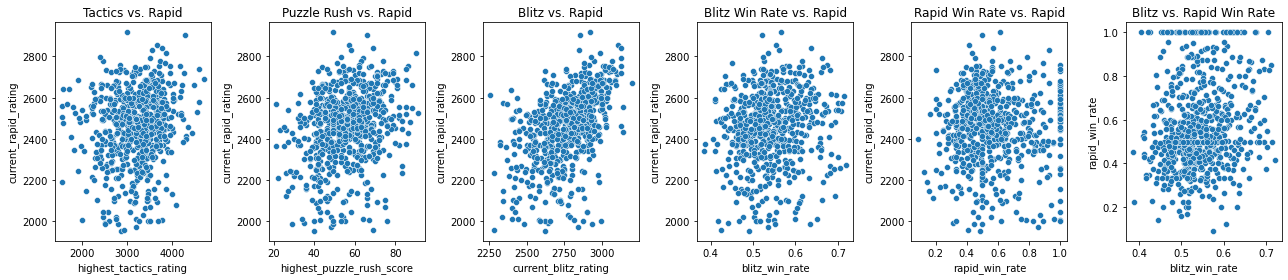

In [13]:
# Scatter plot'lar ile ikili ilişkilerin incelenmesi
plt.figure(figsize=(18, 4))
plt.subplot(1, 6, 1)
sns.scatterplot(x='highest_tactics_rating', y='current_rapid_rating', data=df_clean)
plt.title("Tactics vs. Rapid")
plt.subplot(1, 6, 2)
sns.scatterplot(x='highest_puzzle_rush_score', y='current_rapid_rating', data=df_clean)
plt.title("Puzzle Rush vs. Rapid")
plt.subplot(1, 6, 3)
sns.scatterplot(x='current_blitz_rating', y='current_rapid_rating', data=df_clean)
plt.title("Blitz vs. Rapid")
plt.subplot(1, 6, 4)
sns.scatterplot(x='blitz_win_rate', y='current_rapid_rating', data=df_clean)
plt.title("Blitz Win Rate vs. Rapid")
plt.subplot(1, 6, 5)
sns.scatterplot(x='rapid_win_rate', y='current_rapid_rating', data=df_clean)
plt.title("Rapid Win Rate vs. Rapid")
plt.subplot(1, 6, 6)
sns.scatterplot(x='blitz_win_rate', y='rapid_win_rate', data=df_clean)
plt.title("Blitz vs. Rapid Win Rate")
plt.tight_layout()
plt.show()

In [14]:
# Özelliklerin (features) ve hedef değişkenin (target) belirlenmesi
features = ['highest_tactics_rating', 'highest_puzzle_rush_score', 'current_rapid_rating', 'blitz_win_rate', 'rapid_win_rate']
target = 'current_blitz_rating' 
X = df_clean[features]
y = df_clean[target]

# Eğitim ve test veri setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Lineer regresyon modelinin oluşturulması ve eğitim verisi ile eğitilmesi
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_lr = lr_model.predict(X_test)

# Model performansını değerlendirme
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n--- Lineer Regresyon Sonuçları ---")
print("Mean Squared Error (MSE):", mse_lr)
print("R-squared (R²):", r2_lr)


--- Lineer Regresyon Sonuçları ---
Mean Squared Error (MSE): 22602.45612245013
R-squared (R²): 0.1246980881705243


In [16]:
# Random Forest modelinin oluşturulması ve eğitilmesi
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_rf = rf_model.predict(X_test)

# Model performansını değerlendirme
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regresyon Sonuçları ---")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R²):", r2_rf)


--- Random Forest Regresyon Sonuçları ---
Mean Squared Error (MSE): 20547.301454814813
R-squared (R²): 0.20428593472759415


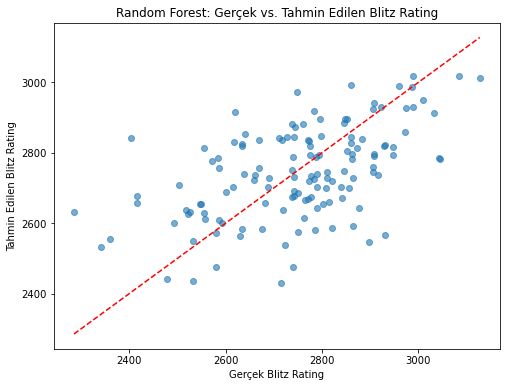

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.xlabel("Gerçek Blitz Rating")
plt.ylabel("Tahmin Edilen Blitz Rating")
plt.title("Random Forest: Gerçek vs. Tahmin Edilen Blitz Rating")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45 derece çizgi
plt.show()


Özellik Önemleri:
current_rapid_rating         0.395017
highest_puzzle_rush_score    0.203333
blitz_win_rate               0.142351
rapid_win_rate               0.139294
highest_tactics_rating       0.120006
dtype: float64


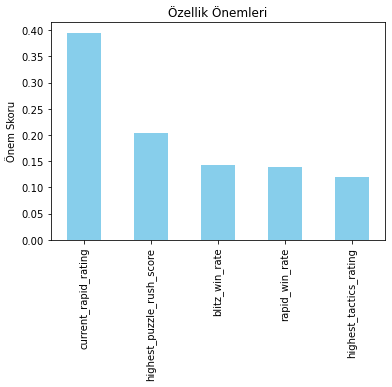

In [18]:
importances = rf_model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
print("\nÖzellik Önemleri:")
print(feature_importance)

plt.figure(figsize=(6, 4))
feature_importance.plot(kind='bar', color='skyblue')
plt.title("Özellik Önemleri")
plt.ylabel("Önem Skoru")
plt.show()